# LGBM & XGBM

**Exploratory Data Analysis (EDA):**

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [292]:
df_train =pd.read_csv("/content/Titanic_train.csv")
df_test = pd.read_csv("/content/Titanic_test.csv")


In [293]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [294]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [295]:
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [296]:
print(df_test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [297]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [298]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [299]:
print(df_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [300]:
print(df_test.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [301]:
print(df_train.shape)

(891, 12)


In [302]:
print(df_test.shape)

(418, 11)


In [303]:
# Train Missing values
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [304]:
# Test Missing values
print(df_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [305]:
# Numerical features
numerical_features = ['Age', 'Fare']

# Categorical features
categorical_features = ['Embarked', 'Pclass', 'Sex']

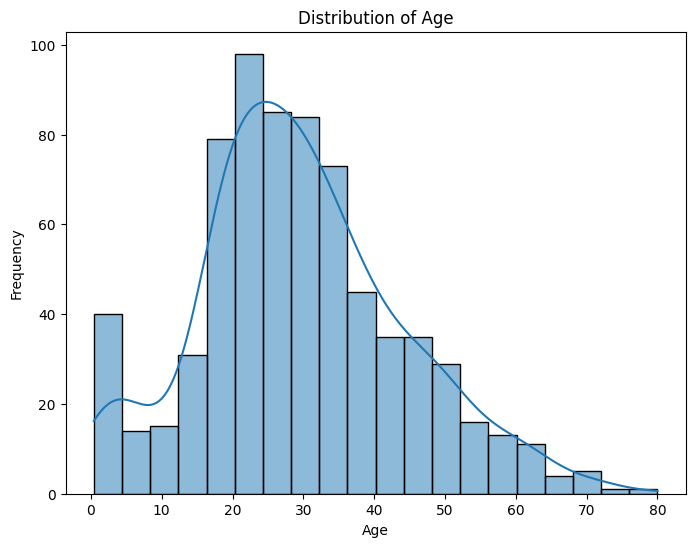

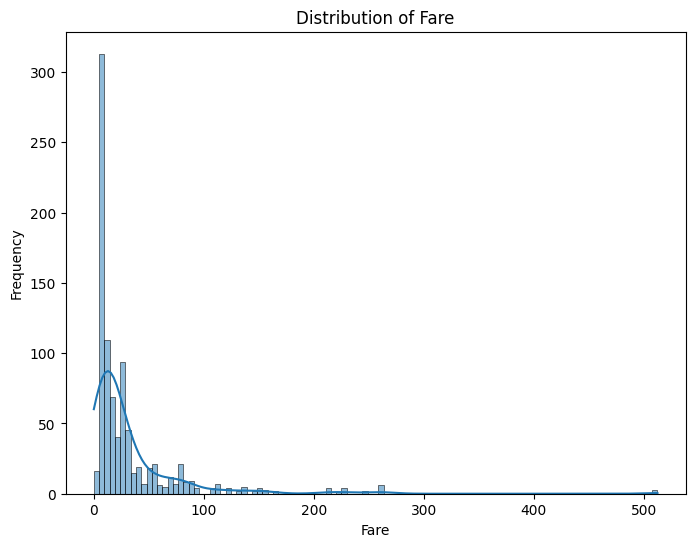

In [306]:
# Histograms
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


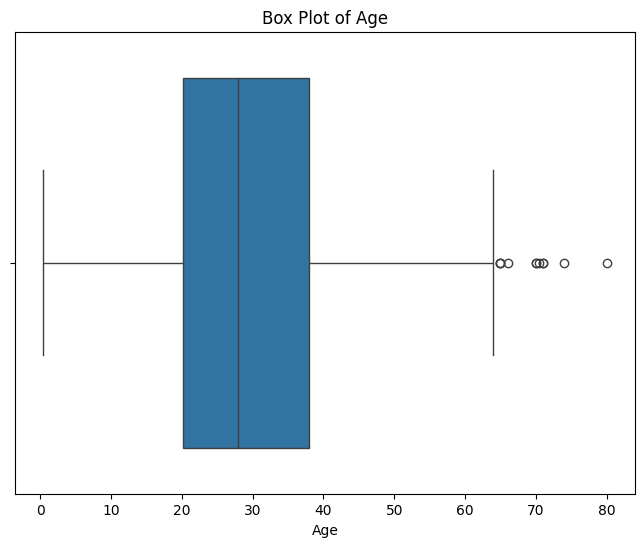

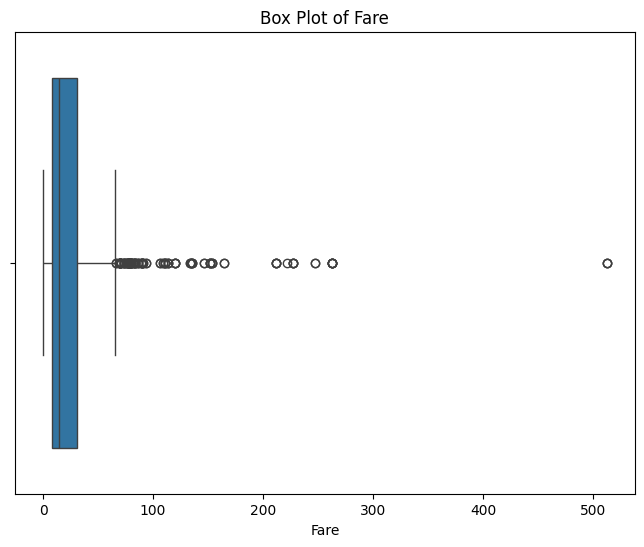

In [307]:

# Box plots
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_train[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


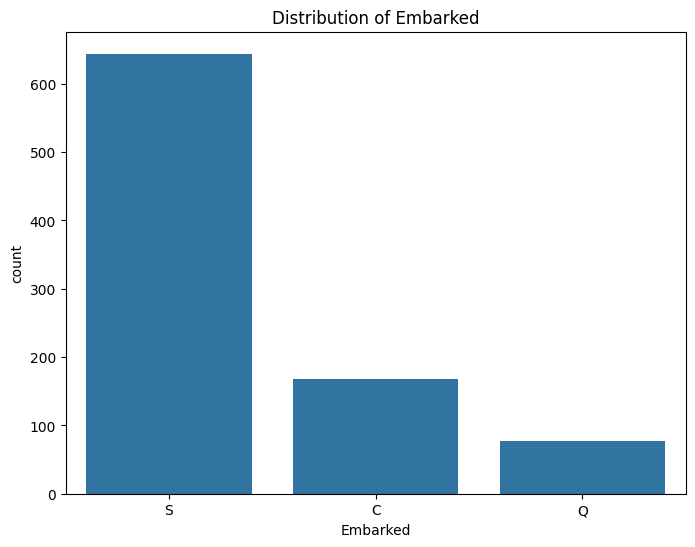

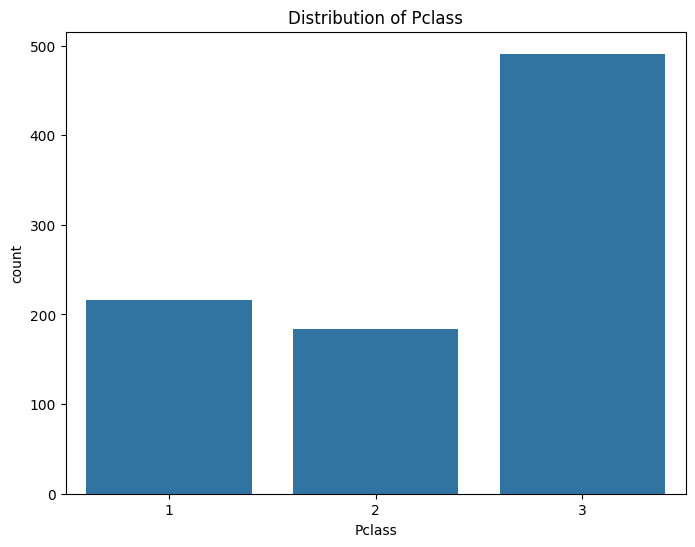

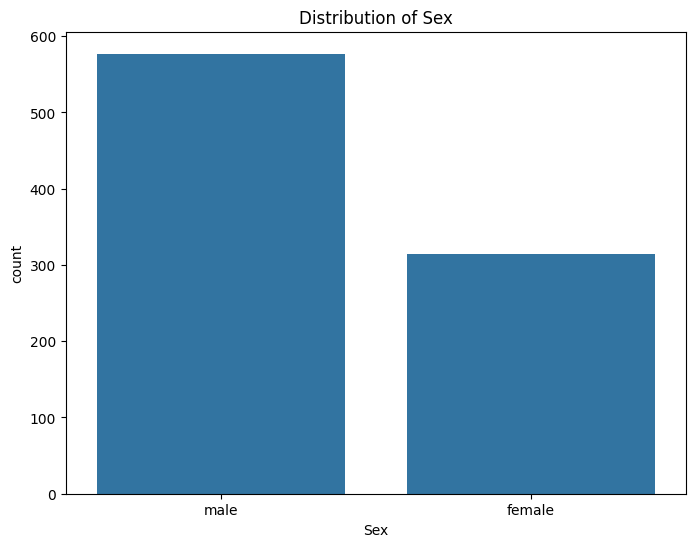

In [308]:
for col in categorical_features:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=col, data=df_train)
  plt.title(f'Distribution of {col}')
  plt.show()

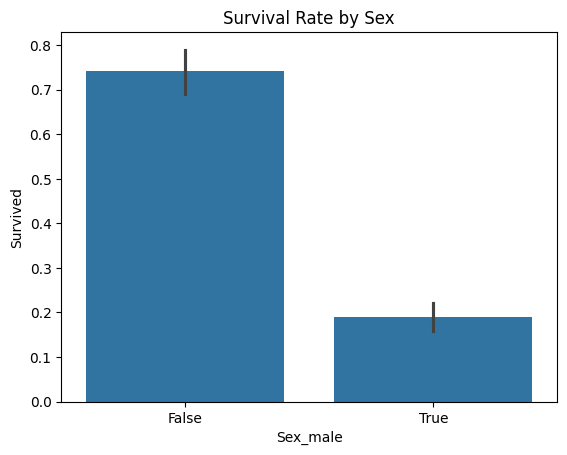

In [309]:
# One-hot encode 'Sex' column in df_train
df_train = pd.get_dummies(df_train, columns=['Sex'], drop_first=True, prefix='Sex')

# Now, the 'Sex_male' column should be available in df_train
sns.barplot(x='Sex_male', y='Survived', data=df_train)  # Use the encoded column name
plt.title('Survival Rate by Sex')
plt.show()

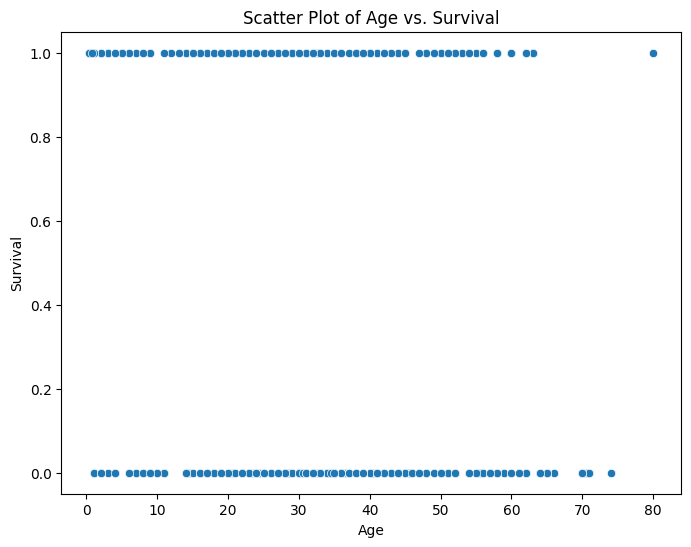

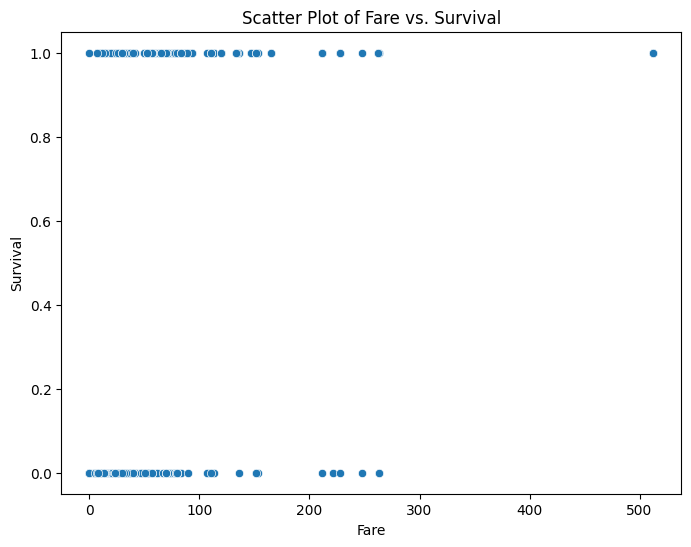

In [310]:
# Scatter plots for numerical features vs. survival
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Survived', data=df_train)
    plt.title(f'Scatter Plot of {col} vs. Survival')
    plt.xlabel(col)
    plt.ylabel('Survival')
    plt.show()


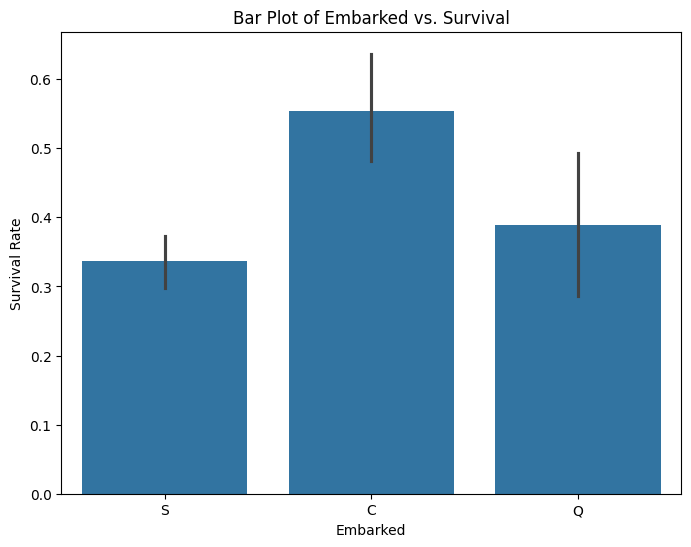

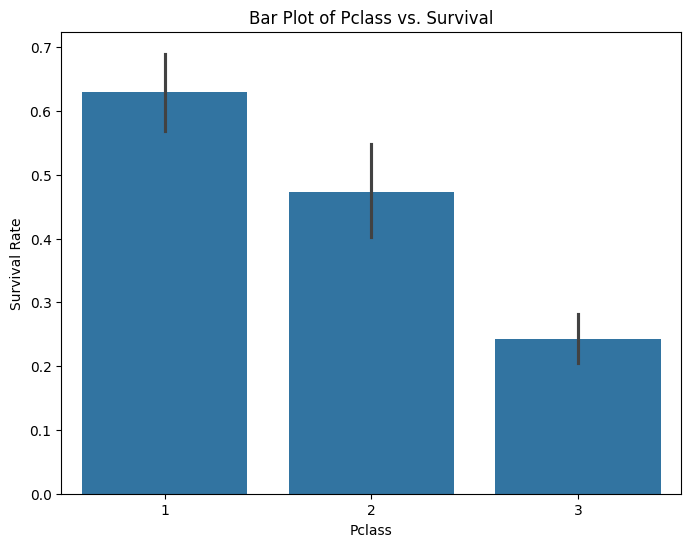

In [311]:
categorical_features = ['Embarked', 'Pclass']

for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=col, y='Survived', data=df_train)
    plt.title(f'Bar Plot of {col} vs. Survival')
    plt.xlabel(col)
    plt.ylabel('Survival Rate')
    plt.show()

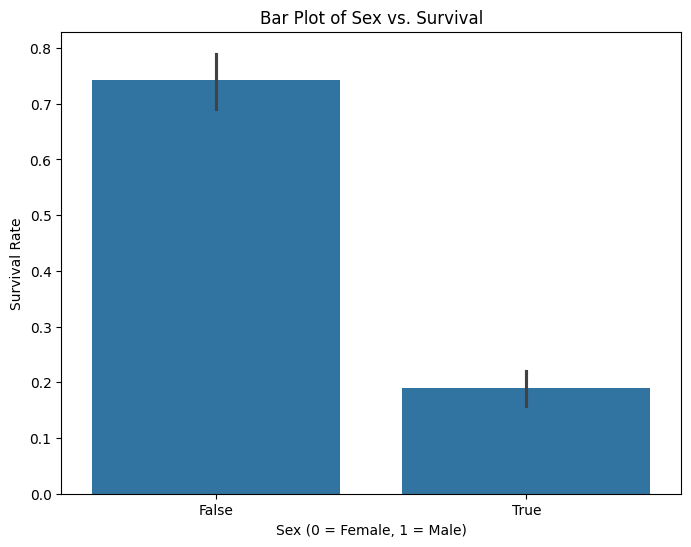

In [312]:
# Create a separate bar plot for the encoded 'Sex' feature (Sex_male)
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex_male', y='Survived', data=df_train)
plt.title('Bar Plot of Sex vs. Survival')
plt.xlabel('Sex (0 = Female, 1 = Male)')  # Explain the encoding
plt.ylabel('Survival Rate')
plt.show()

**Data Preprocessing:**

In [313]:
# Impute missing values for 'Age' using the median
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

In [314]:
# Check if 'Embarked' column exists before imputing
if 'Embarked' in df_train.columns:
    df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
else:
    print("Column 'Embarked' has likely been encoded and does not exist anymore.")

In [315]:
# Impute missing values for 'Fare' in the test set using the median
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)
print(df_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [316]:
# One-hot encode 'Embarked' and 'Sex' IF they haven't been encoded yet
if 'Embarked' in df_train.columns and 'Sex' in df_train.columns:
    df_train = pd.get_dummies(df_train, columns=['Embarked', 'Sex'], drop_first=True)
    df_test = pd.get_dummies(df_test, columns=['Embarked', 'Sex'], drop_first=True)
else:
    print("Columns 'Embarked' and/or 'Sex' have likely already been encoded.")

Columns 'Embarked' and/or 'Sex' have likely already been encoded.


In [317]:
# Label encode 'Pclass'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Pclass'] = le.fit_transform(df_train['Pclass'])
df_test['Pclass'] = le.transform(df_test['Pclass'])

print(df_train.head())
print(df_test.head())

   PassengerId  Survived  Pclass  \
0            1         0       2   
1            2         1       0   
2            3         1       2   
3            4         1       0   
4            5         0       2   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin Embarked  Sex_male  
0         A/5 21171   7.2500   NaN        S      True  
1          PC 17599  71.2833   C85        C     False  
2  STON/O2. 3101282   7.9250   NaN        S     False  
3            113803  53.1000  C123        S     False  
4            373450   8.0500   NaN        S   

In [318]:
# Feature Engineering: Create new features based on existing ones
# Check if 'SibSp' and 'Parch' columns exist before using them
if 'SibSp' in df_train.columns and 'Parch' in df_train.columns:
    df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
else:
    print("Columns 'SibSp' and/or 'Parch' are not found in df_train.")

if 'SibSp' in df_test.columns and 'Parch' in df_test.columns:
    df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
else:
    print("Columns 'SibSp' and/or 'Parch' are not found in df_test.")


In [319]:
# Binning numerical features
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'YoungAdult', 'Adult', 'Senior'])
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'YoungAdult', 'Adult', 'Senior'])

In [320]:
# One-hot encode the new 'AgeGroup' feature
df_train = pd.get_dummies(df_train, columns=['AgeGroup'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['AgeGroup'], drop_first=True)

In [321]:
from sklearn.preprocessing import MinMaxScaler

In [322]:
# Scaling numerical features (example: MinMaxScaler)

scaler = MinMaxScaler()
numerical_cols_to_scale = ['Age', 'Fare', 'FamilySize']

df_train[numerical_cols_to_scale] = scaler.fit_transform(df_train[numerical_cols_to_scale])
df_test[numerical_cols_to_scale] = scaler.transform(df_test[numerical_cols_to_scale])

In [323]:
# Drop unnecessary columns (example)
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']  # Add more columns as needed
df_train.drop(columns=cols_to_drop, errors='ignore', inplace=True)
df_test.drop(columns=cols_to_drop, errors='ignore', inplace=True)

print(df_train.head())
print(df_test.head())

   Survived  Pclass       Age      Fare Embarked  Sex_male  FamilySize  \
0         0       2  0.271174  0.014151        S      True         0.1   
1         1       0  0.472229  0.139136        C     False         0.1   
2         1       2  0.321438  0.015469        S     False         0.0   
3         1       0  0.434531  0.103644        S     False         0.1   
4         0       2  0.434531  0.015713        S      True         0.0   

   AgeGroup_YoungAdult  AgeGroup_Adult  AgeGroup_Senior  
0                 True           False            False  
1                False            True            False  
2                 True           False            False  
3                False            True            False  
4                False            True            False  
   Pclass     Sex       Age      Fare Embarked  FamilySize  \
0       2    male  0.428248  0.015282        Q         0.0   
1       2  female  0.585323  0.013663        S         0.1   
2       1    male  0.

**Building Predictive Models:**

In [324]:
from sklearn.model_selection import train_test_split

In [325]:
# Assuming 'Survived' is your target variable
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [326]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [327]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 712
Testing set size: 179


In [328]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [329]:
from sklearn.linear_model import LogisticRegression

In [330]:
# One-hot encode categorical features 'Embarked' and 'Sex' IF THEY HAVEN'T BEEN ENCODED
if 'Embarked' in df_train.columns and 'Sex' in df_train.columns:
    for col in ['Embarked', 'Sex']:
        # Create dummy variables for the column in the training set
        dummies_train = pd.get_dummies(df_train[col], prefix=col, drop_first=True)
        df_train = pd.concat([df_train, dummies_train], axis=1)

        # Create dummy variables for the column in the test set
        # Use the same categories from the training set to ensure consistency
        dummies_test = pd.get_dummies(df_test[col], prefix=col, drop_first=True)

        # Handle cases where a category is present in train but not in test
        missing_cols = set(dummies_train.columns) - set(dummies_test.columns)
        for col in missing_cols:
            dummies_test[col] = 0

        # Handle cases where a category is present in test but not in train
        missing_cols = set(dummies_test.columns) - set(dummies_train.columns)
        for col in missing_cols:
            dummies_train[col] = 0

        df_test = pd.concat([df_test, dummies_test], axis=1)

    # Drop the original 'Embarked' and 'Sex' columns
    df_train.drop(['Embarked', 'Sex'], axis=1, inplace=True, errors='ignore')
    df_test.drop(['Embarked', 'Sex'], axis=1, inplace=True, errors='ignore')
else:
    print("Columns 'Embarked' and/or 'Sex' have likely already been encoded.")

Columns 'Embarked' and/or 'Sex' have likely already been encoded.


In [331]:
# Identify columns with 'object' dtype (likely categorical)
categorical_cols = df_train.select_dtypes(include=['object']).columns

# One-hot encode categorical features
for col in categorical_cols:
    # Create dummy variables for the column in the training set
    dummies_train = pd.get_dummies(df_train[col], prefix=col, drop_first=True, dummy_na=False)
    df_train = pd.concat([df_train, dummies_train], axis=1)

    # Create dummy variables for the column in the test set
    dummies_test = pd.get_dummies(df_test[col], prefix=col, drop_first=True, dummy_na=False)
    df_test = pd.concat([df_test, dummies_test], axis=1)

    # Drop the original columns
    df_train.drop(columns=[col], inplace=True)
    df_test.drop(columns=[col], inplace=True)

# Split the data again after encoding
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now try fitting the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [332]:
# After training the model:
y_pred = model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Now print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cm

Accuracy: 0.7932960893854749
Precision: 0.7605633802816901
Recall: 0.7297297297297297
F1-score: 0.7448275862068966
Confusion Matrix:


array([[88, 17],
       [20, 54]])

In [333]:
from sklearn.metrics import accuracy_score, classification_report

In [334]:
df_train = pd.read_csv("/content/Titanic_train.csv")
df_test = pd.read_csv("/content/Titanic_test.csv")

In [335]:
# Identify existing one-hot encoded 'Embarked' columns
embarked_cols = [col for col in X_train.columns if 'Embarked_' in col]

# Remove duplicate one-hot encoded 'Embarked' columns, keeping the first instance
if len(embarked_cols) > 1:
    cols_to_drop = embarked_cols[1:]  # Drop all except the first 'Embarked_' column
    X_train = X_train.drop(columns=cols_to_drop)
    X_test = X_test.drop(columns=cols_to_drop)

# LightGBM Model (continue with your model building)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)


In [336]:
params = {
    'objective': 'binary',  # For binary classification
    'metric': 'binary_logloss',  # or 'auc'
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

lgb_model = lgb.train(params,
                      lgb_train,
                      num_boost_round=100,  # Adjust the number of boosting rounds
                      valid_sets=lgb_test)

y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
y_pred_lgb_class = [1 if prob > 0.5 else 0 for prob in y_pred_lgb]  # Convert probabilities to classes


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [337]:
# XGBoost Model
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',  # or 'auc'
    'eta': 0.05,  # Learning rate
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

xgb_model = xgb.train(params,
                      xgb_train,
                      num_boost_round=100,  # Adjust the number of boosting rounds
                      evals=[(xgb_train, 'train'), (xgb_test, 'test')])

y_pred_xgb = xgb_model.predict(xgb_test)
y_pred_xgb_class = [1 if prob > 0.5 else 0 for prob in y_pred_xgb]

# Evaluate the models
print("LightGBM Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb_class)}")
print(classification_report(y_test, y_pred_lgb_class))

print("\nXGBoost Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_class)}")
print(classification_report(y_test, y_pred_xgb_class))

[0]	train-logloss:0.65014	test-logloss:0.67107
[1]	train-logloss:0.63163	test-logloss:0.65362
[2]	train-logloss:0.61154	test-logloss:0.63353
[3]	train-logloss:0.59239	test-logloss:0.61656
[4]	train-logloss:0.57567	test-logloss:0.59974
[5]	train-logloss:0.55949	test-logloss:0.58543
[6]	train-logloss:0.55323	test-logloss:0.57902
[7]	train-logloss:0.53744	test-logloss:0.56465
[8]	train-logloss:0.52424	test-logloss:0.55274
[9]	train-logloss:0.51201	test-logloss:0.54118
[10]	train-logloss:0.50592	test-logloss:0.53475
[11]	train-logloss:0.49500	test-logloss:0.52667
[12]	train-logloss:0.48601	test-logloss:0.51939
[13]	train-logloss:0.47620	test-logloss:0.51005
[14]	train-logloss:0.47156	test-logloss:0.50657
[15]	train-logloss:0.46340	test-logloss:0.49931
[16]	train-logloss:0.45565	test-logloss:0.49281
[17]	train-logloss:0.44779	test-logloss:0.48457
[18]	train-logloss:0.43947	test-logloss:0.47865
[19]	train-logloss:0.43260	test-logloss:0.47272
[20]	train-logloss:0.42952	test-logloss:0.47036
[2

In [338]:
# Evaluate the models
print("LightGBM Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb_class)}")
print(classification_report(y_test, y_pred_lgb_class))

print("\nXGBoost Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_class)}")
print(classification_report(y_test, y_pred_xgb_class))

LightGBM Evaluation:
Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


XGBoost Evaluation:
Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



**Comparative Analysis:**

In [339]:
!pip install lightgbm --upgrade

In [340]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [341]:
# LightGBM Model
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

lgb_params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt'
}

In [342]:
# Create LightGBM model object
lgb_model = lgb.train(lgb_params, lgb_train,
                     valid_sets=[lgb_train, lgb_eval],  # Pass both train and validation sets
                     num_boost_round=100,
                     callbacks=[lgb.early_stopping(stopping_rounds=10),
                                lgb.log_evaluation(10)],  # Log evaluation every 10 rounds
                                 )

y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
y_pred_lgb_class = [1 if prob >= 0.5 else 0 for prob in y_pred_lgb]

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [343]:
# XGBoost Model
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_eval = xgb.DMatrix(X_test, label=y_test)

xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

xgb_model = xgb.train(xgb_params, xgb_train, evals=[(xgb_eval, 'eval')], num_boost_round=100, early_stopping_rounds=10)
y_pred_xgb = xgb_model.predict(xgb_eval)
y_pred_xgb_class = [1 if prob >= 0.5 else 0 for prob in y_pred_xgb]

[0]	eval-logloss:0.55672
[1]	eval-logloss:0.49660
[2]	eval-logloss:0.46441
[3]	eval-logloss:0.44584
[4]	eval-logloss:0.42895
[5]	eval-logloss:0.42220
[6]	eval-logloss:0.41724
[7]	eval-logloss:0.41164
[8]	eval-logloss:0.41919
[9]	eval-logloss:0.41864
[10]	eval-logloss:0.41693
[11]	eval-logloss:0.41775
[12]	eval-logloss:0.41764
[13]	eval-logloss:0.41909
[14]	eval-logloss:0.41819
[15]	eval-logloss:0.42013
[16]	eval-logloss:0.41909


In [344]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

lgb_accuracy, lgb_precision, lgb_recall, lgb_f1 = evaluate_model(y_test, y_pred_lgb_class)
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = evaluate_model(y_test, y_pred_xgb_class)

In [345]:
print("LightGBM Metrics:")
print(f"Accuracy: {lgb_accuracy:.4f}")
print(f"Precision: {lgb_precision:.4f}")
print(f"Recall: {lgb_recall:.4f}")
print(f"F1-score: {lgb_f1:.4f}")

print("\nXGBoost Metrics:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-score: {xgb_f1:.4f}")

LightGBM Metrics:
Accuracy: 0.8268
Precision: 0.8209
Recall: 0.7432
F1-score: 0.7801

XGBoost Metrics:
Accuracy: 0.8436
Precision: 0.8594
Recall: 0.7432
F1-score: 0.7971


In [346]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [347]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

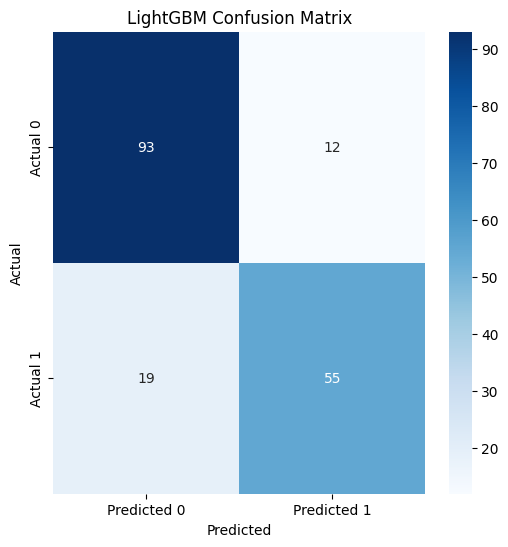

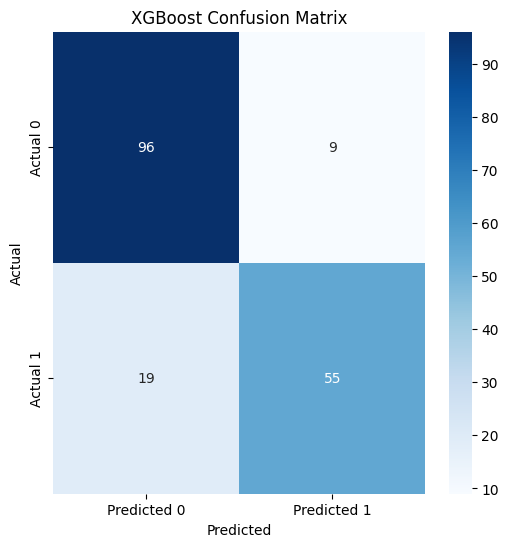

In [348]:
plot_confusion_matrix(y_test, y_pred_lgb_class, "LightGBM Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_xgb_class, "XGBoost Confusion Matrix")

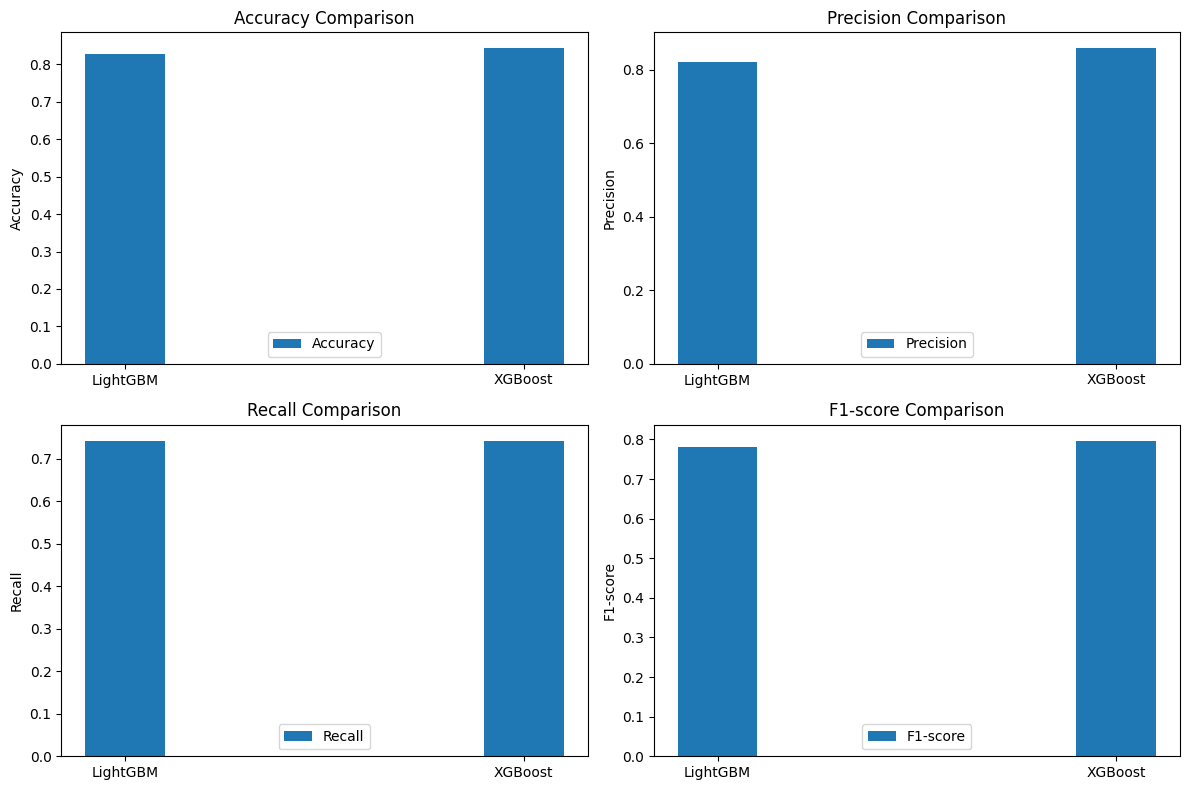

In [349]:
# Comparative Analysis Visualization:

models = ['LightGBM', 'XGBoost']
accuracy = [lgb_accuracy, xgb_accuracy]
precision = [lgb_precision, xgb_precision]
recall = [lgb_recall, xgb_recall]
f1 = [lgb_f1, xgb_f1]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

x = range(len(models))
width = 0.2

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].bar(x, values[i], width, label=metric)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(models)
    axes[i].set_ylabel(metric)
    axes[i].set_title(f'{metric} Comparison')
    axes[i].legend()

plt.tight_layout()
plt.show()
